In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


G:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data=pd.read_csv("cancer.csv")

In [3]:
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [4]:
data.groupby(["Class"]).count()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
Class,,,,,,,,,
0,444,444,444,444,444,444,444,444,444
1,239,239,239,239,239,239,239,239,239


In [5]:
y=data.Class
x=data.drop(["Class"], axis=1)

<function matplotlib.pyplot.xticks(*args, **kwargs)>

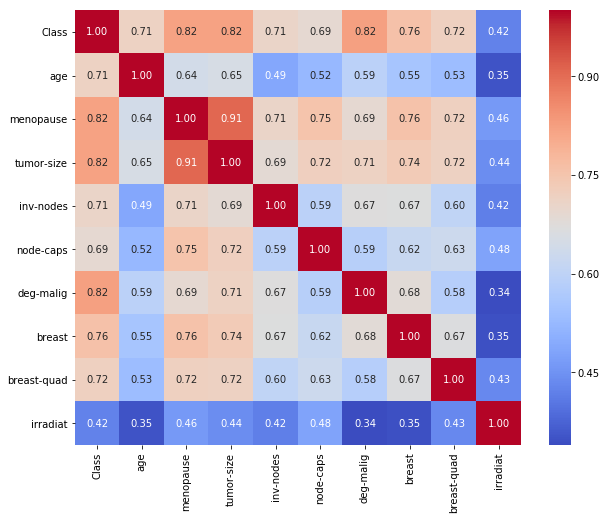

In [6]:
#corr for each feature
fig, ax = plt.subplots(figsize=(10,8))

correlation = data.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks

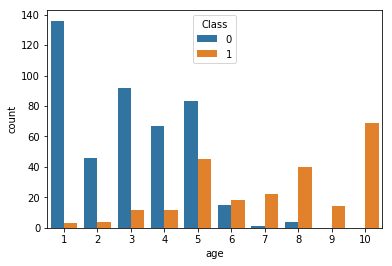

In [7]:
sns.countplot(x='age', hue='Class', data=data)

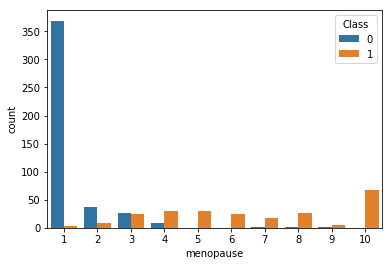

In [8]:
sns.countplot(x='menopause', hue='Class', data=data)

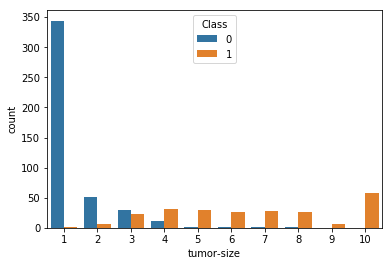

In [9]:
sns.countplot(x='tumor-size', hue='Class', data=data)

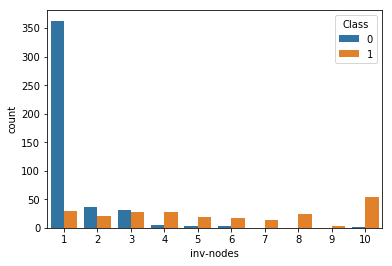

In [10]:
sns.countplot(x='inv-nodes', hue='Class', data=data)

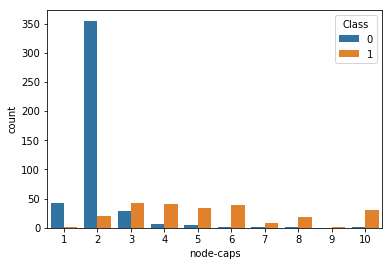

In [11]:
sns.countplot(x='node-caps', hue='Class', data=data)

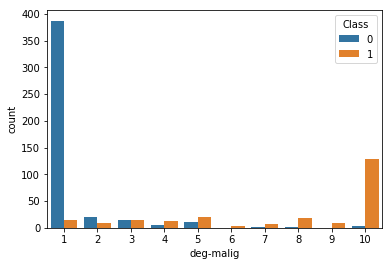

In [12]:
sns.countplot(x='deg-malig', hue='Class', data=data)

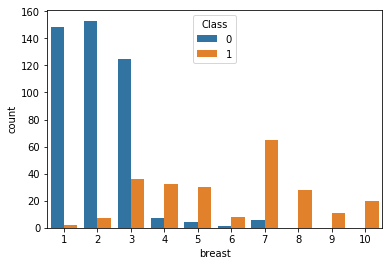

In [13]:
sns.countplot(x='breast', hue='Class', data=data)

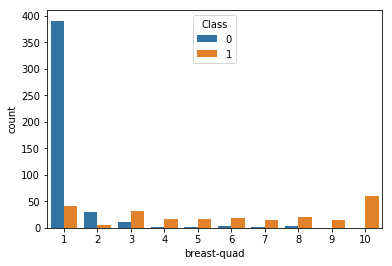

In [14]:
sns.countplot(x='breast-quad', hue='Class', data=data)

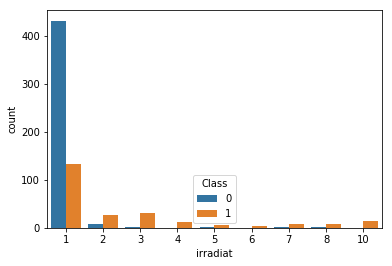

In [15]:
sns.countplot(x='irradiat', hue='Class', data=data)

In [16]:
#scaling
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()


,0,1,2,3,4,5,6,7,8
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (546, 9)
x test:  (137, 9)
y train:  (546,)
y test:  (137,)


In [18]:
def model(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("train score",model.score(x_train,y_train) )
    print("test score" , model.score(x_test,y_test))
    print(classification_report(y_test,pred))

In [19]:
gnb=GaussianNB()

In [20]:
model(gnb)

train score 0.9652014652014652
test score 0.948905109489051
             precision    recall  f1-score   support

          0       1.00      0.92      0.96        87
          1       0.88      1.00      0.93        50

avg / total       0.96      0.95      0.95       137



In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [22]:
model(mlp)

train score 0.9963369963369964
test score 0.9781021897810219
             precision    recall  f1-score   support

          0       0.99      0.98      0.98        87
          1       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       137

